
## Data Preprocessing and PCA for Clustering

### Step 1: Load the Dataset
Load the dataset using `pandas` and display the initial data.

### Step 2: Clean the Data
Drop columns with all missing values and the `status_id` column.

### Step 3: Identify Numerical and Categorical Columns
Determine which columns are numerical and which are categorical for preprocessing.

### Step 4: Define and Apply Preprocessing Steps
Scale numerical columns and encode categorical columns using `StandardScaler` and `OneHotEncoder`.

### Step 5: Apply PCA
Reduce the dimensionality of the preprocessed data to two principal components with PCA.

### Step 6: Convert PCA Results to DataFrame
Create a `DataFrame` from the PCA results for easier analysis and visualization.

### Step 7: Display the First Few Rows
Show the first few rows of the PCA-transformed dataset to verify the preprocessing steps.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Load your dataset
data_path = '/content/sample_data/Live.csv'
data = pd.read_csv(data_path)
print("Initial data loaded.")

# Drop columns with all missing values and the 'status_id' column
data_cleaned = data.drop(columns=['Column1', 'Column2', 'Column3', 'Column4', 'status_id'])
print("Columns with all missing values and 'status_id' dropped.")

# Identify numerical and categorical columns
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = ['status_type']  # Only including 'status_type' as a relevant categorical variable
print(f"Identified numerical columns: {list(numerical_cols)}")
print(f"Identified categorical columns: {categorical_cols}")

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])
print("Preprocessing steps defined.")

# Apply the preprocessing steps
data_preprocessed = preprocessor.fit_transform(data_cleaned.drop(columns=['status_published']))
print("Preprocessing steps applied (scaling and encoding).")

# Get feature names after OneHotEncoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine all feature names
all_feature_names = list(numerical_cols) + list(ohe_feature_names)
print("Feature names after OneHotEncoding and scaling:", all_feature_names)

# Apply PCA to reduce the data to two principal components for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_preprocessed)
print("PCA applied to reduce the dataset to two principal components.")

# Convert the PCA-transformed data to a DataFrame for visualization and further analysis
data_pca_df = pd.DataFrame(data_pca, columns=['Principal Component 1', 'Principal Component 2'])
print("PCA-transformed dataset created.")

# Display the first few rows of the PCA-transformed dataset
print("First few rows of the PCA-transformed dataset:")
print(data_pca_df.head())


Initial data loaded.
Columns with all missing values and 'status_id' dropped.
Identified numerical columns: ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
Identified categorical columns: ['status_type']
Preprocessing steps defined.
Preprocessing steps applied (scaling and encoding).
Feature names after OneHotEncoding and scaling: ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']
PCA applied to reduce the dataset to two principal components.
PCA-transformed dataset created.
First few rows of the PCA-transformed dataset:
   Principal Component 1  Principal Component 2
0               2.366491              -0.157768
1              -0.698267               0.072443
2               0.227063              -0.128665
3              -0.746089              -0.03665

# K Means Clustering

In [ ]:
!pip install kneed

**Finding the optimal number of clusters using elbow method:**
The kneed library is installed and used primarily to identify the knee or elbow point in a curve programmatically. This is especially useful in the context of the elbow method for determining the optimal number of clusters in K-Means clustering. The library analyzes the curve of the sum of squared distances (inertia) to each cluster center as the number of clusters varies. By identifying the point where the inertia starts decreasing at a slower rate (the elbow point), kneed helps in selecting an appropriate number of clusters without relying solely on visual inspection, making the process more objective and reproducible.








/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

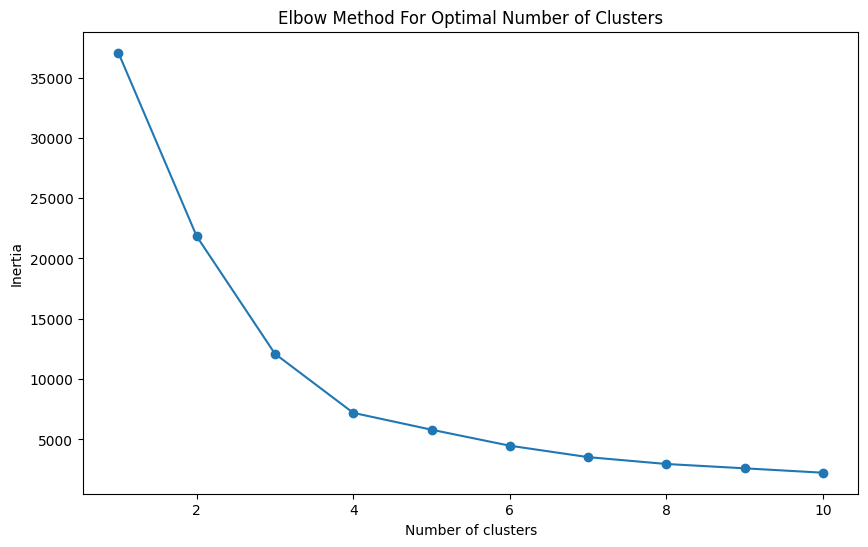

The optimal number of clusters is: 4


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Assuming 'data_pca' is your PCA-transformed dataset

# Determine the range of cluster counts to evaluate
range_clusters = range(1, 11)

# List to store the inertia for each cluster count
inertias = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_pca)
    inertias.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

# Use KneeLocator to find the elbow point, which is the optimal number of clusters
knee_locator = KneeLocator(range_clusters, inertias, curve='convex', direction='decreasing')

print(f"The optimal number of clusters is: {knee_locator.elbow}")


**Training the K-Means model on the dataset and visualizing the clusters:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


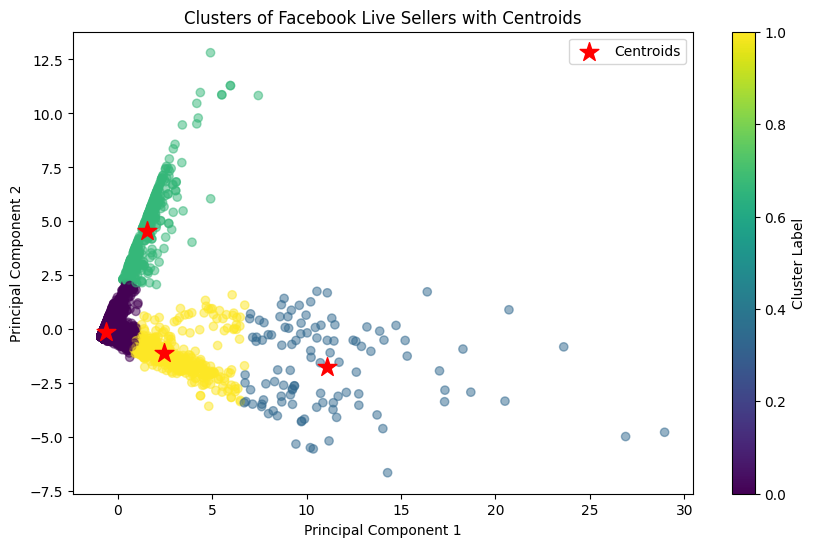

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming the optimal number of clusters is k
optimal_clusters = 4

# Initialize the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

# Fit the model on your PCA-reduced dataset
kmeans.fit(data_pca)

# The cluster labels for each data point
labels = kmeans.labels_

# The centroids of the clusters
centroids = kmeans.cluster_centers_

# Adding the cluster labels to your PCA DataFrame for easy visualization and analysis
data_pca_df['Cluster'] = labels

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_pca_df['Principal Component 1'], data_pca_df['Principal Component 2'], c=data_pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='*', label='Centroids')
plt.title('Clusters of Facebook Live Sellers with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


# Hierarchical clustering

**Training the Hierarchical model on the dataset and visualizing the clusters:**

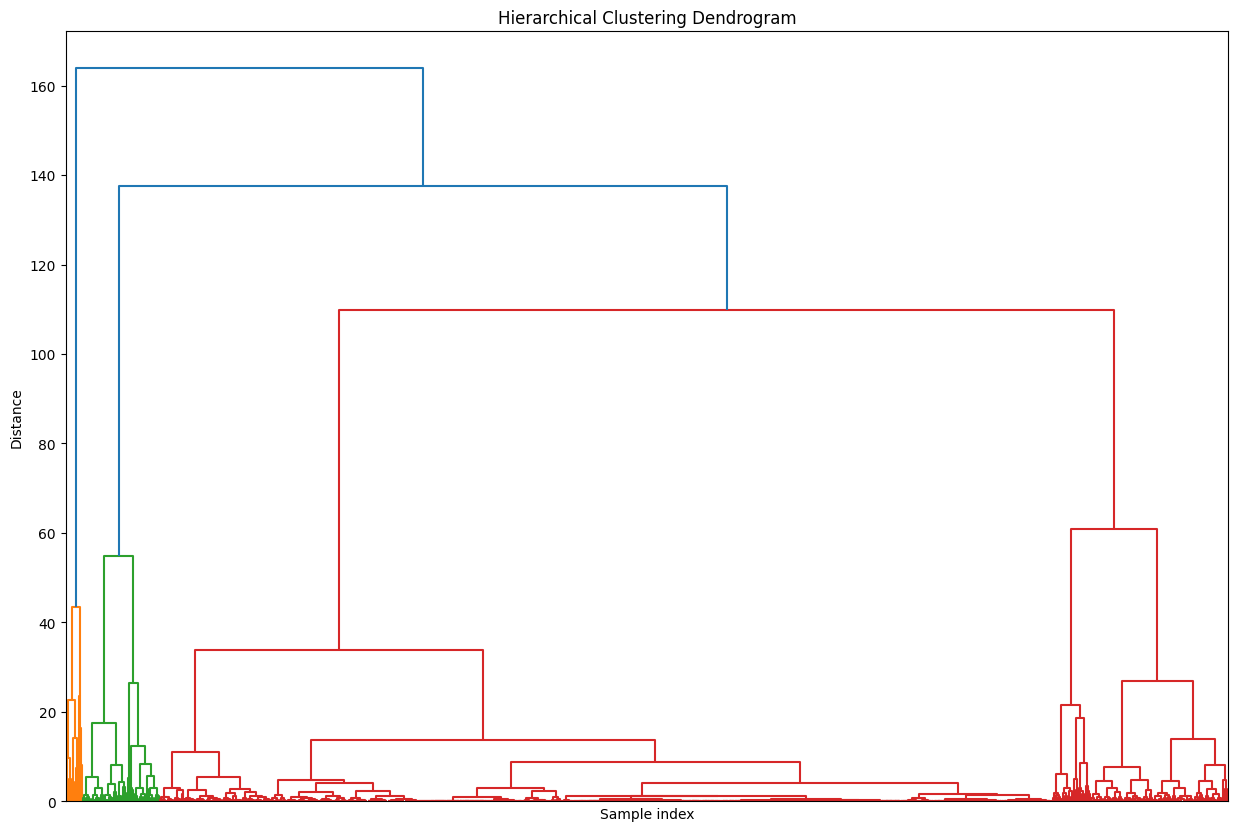

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'data_pca' is your PCA-reduced dataset for clustering

# Generate the linkage matrix using the Ward method
Z = linkage(data_pca, method='ward')

# Plot the dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(15, 10))
dendrogram(Z, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


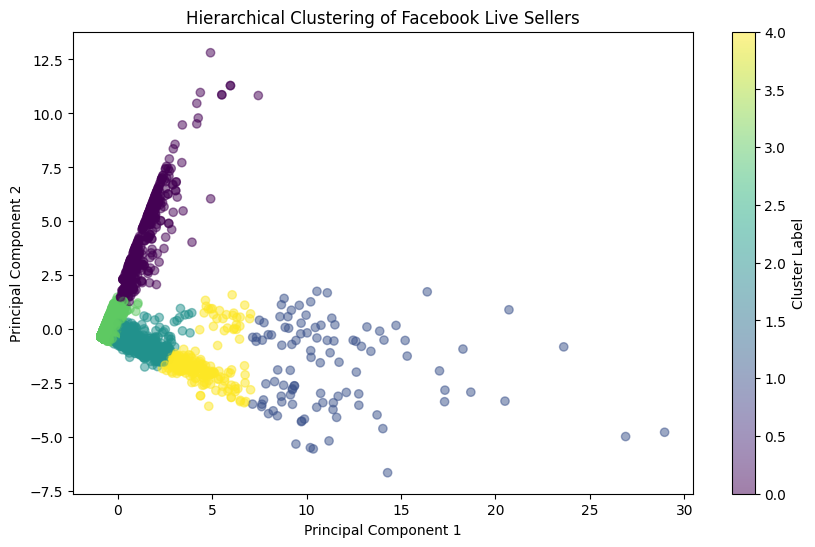

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Assuming 'data_pca' is your PCA-reduced dataset

# Initialize the Agglomerative Clustering model
hc_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# Fit the model and predict the clusters
hc_labels = hc_model.fit_predict(data_pca)

# Adding the cluster labels to your PCA DataFrame for visualization
data_pca_df['Cluster'] = hc_labels

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_pca_df['Principal Component 1'], data_pca_df['Principal Component 2'], c=data_pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Hierarchical Clustering of Facebook Live Sellers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
